First, import the ussual modules 

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

Now load the data and take a look at it

In [68]:
from datetime import datetime

#data = pd.read_csv('../../data/baseball/Bautista.csv', index_col=3, parse_dates=True)
data = pd.read_csv('../../data/baseball/Bautista.csv')
#data.index=data.index-pd.offsets.Day(5*365+1)

data.head()

,Rk,Gcar,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,...,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,RE24,Pos
0,1,737,1,1-Apr,TOR,MIN,W13-3,CG,5,4,...,0,0.750,0.800,1.500,2.300,3,0.34,0.025,1.76,RF
1,2,738,2,2-Apr,TOR,MIN,W6-1,CG,5,3,...,0,0.429,0.600,0.857,1.457,3,0.70,0.025,-0.26,RF
2,3,739,3,3-Apr,TOR,MIN,L3-4,CG,5,4,...,0,0.455,0.600,1.000,1.600,3,3.09,0.081,0.81,RF
3,4,740,7�(3),8-Apr,TOR,LAA,W3-2,CG,4,4,...,0,0.400,0.526,0.800,1.326,3,0.58,0.004,-0.03,RF
4,5,741,8,9-Apr,TOR,LAA,L5-6,CG(14),7,4,...,0,0.421,0.577,0.737,1.314,3,2.15,0.177,1.05,RF


Convert dates to time and make the date the index

In [69]:
# this is a bit tricky -- here we use a lambda (a function to be applied repeatedly) to the date, so the year
# is added to the date
data.Date=data.Date.apply(lambda x: x+' 2011')

# now we use the pandas utility 'to_datetime' to convert the Date to a time 
print "date time is a: "+str(data.Date.dtype)
data.Date=pd.to_datetime(data.Date)
print "now it is a : "+str(data.Date.dtype)

# finally we want to use the date as an index
data.index=data.Date
data.head()

date time is a: object
now it is a : datetime64[ns]


,Rk,Gcar,Gtm,Date,Tm,Opp,Rslt,Inngs,PA,AB,...,CS,BA,OBP,SLG,OPS,BOP,aLI,WPA,RE24,Pos
Date,,,,,,,,,,,,,,,,,,,,,
2011-04-01,1,737,1,2011-04-01,TOR,MIN,W13-3,CG,5,4,...,0,0.750,0.800,1.500,2.300,3,0.34,0.025,1.76,RF
2011-04-02,2,738,2,2011-04-02,TOR,MIN,W6-1,CG,5,3,...,0,0.429,0.600,0.857,1.457,3,0.70,0.025,-0.26,RF
2011-04-03,3,739,3,2011-04-03,TOR,MIN,L3-4,CG,5,4,...,0,0.455,0.600,1.000,1.600,3,3.09,0.081,0.81,RF
2011-04-08,4,740,7�(3),2011-04-08,TOR,LAA,W3-2,CG,4,4,...,0,0.400,0.526,0.800,1.326,3,0.58,0.004,-0.03,RF
2011-04-09,5,741,8,2011-04-09,TOR,LAA,L5-6,CG(14),7,4,...,0,0.421,0.577,0.737,1.314,3,2.15,0.177,1.05,RF


Plot the time series

2011-07-25 00:00:00
Ankle injury
2011-09-12 00:00:00
Oblique injury


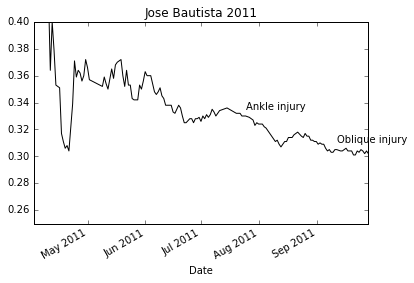

In [66]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

avg=data['BA']

avg.plot(ax=ax, style='k-')


injury_data = [
    (datetime(2011, 7, 25), 'Ankle injury'),
    (datetime(2011, 9, 12), 'Oblique injury'),
]


for date, label in injury_data:
    print date
    print label
    
    ax.annotate(label, xy=(date, avg.asof(date) + 0.005))
    
#ax.set_xlim(['4/1/2011', '10/1/2011'])
ax.set_ylim([0.25, 0.4])

ax.set_title('Jose Bautista 2011')

plt.show()


Plot using the bokeh library (bokeh is an extra python plotting library that is used for interactive plots)

In [70]:
import numpy as np
from collections import OrderedDict
from bokeh.plotting import *
from bokeh.models import HoverTool
import calendar

TOOLS="pan,wheel_zoom,box_zoom,reset,previewsave,hover"

output_file("bautista.html", title="Bautista 2011")

p1 = figure(x_axis_type = "datetime", plot_width=1500,plot_height=700, title="Jose Bautista 2011", x_axis_label='date', y_axis_label='avg')

dateStrings=[calendar.month_abbr[i.month]+" "+str(i.day) for i in data.index]

source = ColumnDataSource(
    data=dict(
        x=data.index,
        avg=data['BA'],
        date=dateStrings
    )
)

s1=p1.scatter(x='x', y='avg', color='#465E33', legend='Bautista', source=source)
p1.line(x='x', y='avg', color='#465E33', source=source)

hover = HoverTool()
hover.tooltips = [("date","@date"),("avg","@avg")]
p1.add_tools(hover)


show(p1)